# Assignment 1

### A. 
For the 4 data sets of mock_data_1.txt, mock_data_2.txt, mock_data_3.txt, mock_data_4.txt (10000 values in each set) attached to this email plot the binned data. Try to choose a reasonable bin size. What is your visual interpretation?

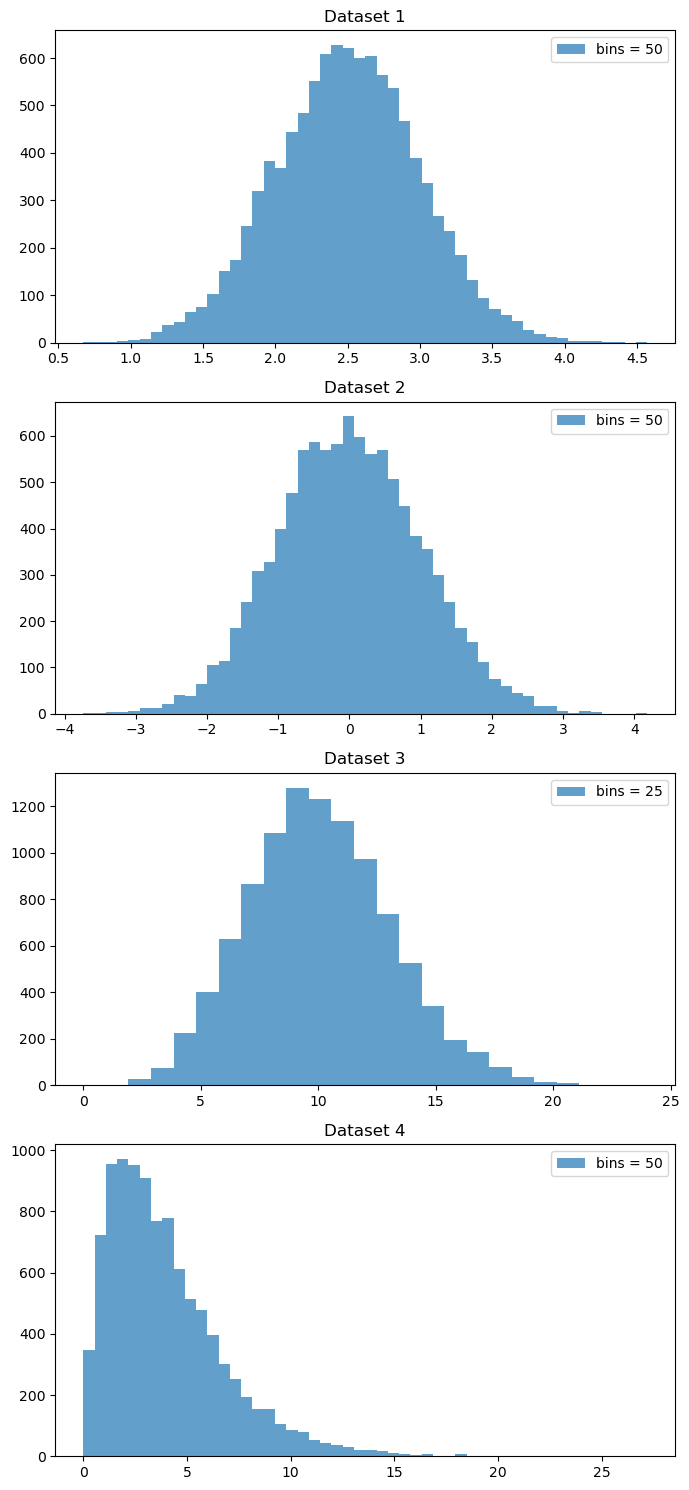

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
data = []
for i in range(1,5):
    data.append(np.loadtxt(f'mock_data_{i}.txt'))

fig, ax = plt.subplots(4, 1, figsize=(7, 15))
for i in range(4):
    if i!=2:
        ax[i].hist(data[i], bins=50, alpha=0.7, label=f'bins = {50}')
    else:
        ax[i].hist(data[i], bins=25, alpha=0.7, label=f'bins = {25}')
    ax[i].set_title(f'Dataset {i+1}')
    ax[i].legend()
    
plt.tight_layout()
plt.show()


Ans : Dataset 1 and 2 shows similar shape of the histogram, which is roughly symmetrical and gaussian-like bell-shaped. However, Dataset 3 and 4 appears to be gaussian-like but with a slight skewness to the left.
When choosing bin size, I tried to set the bins small enough to show the smootheness of the heights of the bins but not too small that it would be too noisy. For example, Dataset 3 showed empty bins when using 50 bins, so I reduced the number of bins to 25 to get a better representation of the data.

Then calculate the following for each dataset:

1. Mean
2. Geometric mean (can you?!)
3. Median
4. Mode
5. Variance
6. Standard deviation
7. Skewness
8. Kurtosis

How do you interpret your results for each dataset?

In [2]:
def mean(data):
    return np.sum(data)/len(data)
def geom_mean(data):
    if np.any(data<=0):
        return np.nan
    else:
        return np.exp(np.sum(np.log(data))/len(data))
def median(data):
    sort = np.sort(data)
    n = len(data)
    if n%2==0:
        return (sort[n//2-1]+sort[n//2])/2
    else:
        return sort[n//2]
def variance(data):
    return mean(data**2)-mean(data)**2
def std(data):
    return np.sqrt(variance(data))
def skewness(data):
    x3 = mean(data**3)
    x2 = mean(data**2)
    x = mean(data)
    sig = std(data)
    return 1/(sig**3)*(x3 - 3*x*x2 + 2*x**3)
def kurtosis(data):
    mu = mean(data)
    return mean((data - mu)**4) / (variance(data)**2) - 3

In [93]:
stats = {'mean' : [], 'geom_mean': [], 'median': [],
         'variance': [], 'std': [], 
         'skewness': [], 'kurtosis': []
         }
for i in range(4):
    stats['mean'].append(mean(data[i]))
    stats['geom_mean'].append(geom_mean(data[i]))
    stats['median'].append(median(data[i]))
    stats['variance'].append(variance(data[i]))
    stats['std'].append(std(data[i]))
    stats['skewness'].append(skewness(data[i]))
    stats['kurtosis'].append(kurtosis(data[i]))


print(f"mean : {np.array(stats['mean'])//0.001/1000}")
print(f"geom_mean : {np.array(stats['geom_mean'])//0.001/1000}")
print(f"median : {np.array(stats['median'])//0.001/1000}")
print(f"variance : {np.array(stats['variance'])//0.001/1000}")
print(f"std : {np.array(stats['std'])//0.001/1000}")
print(f"skewness : {np.array(stats['skewness'])//0.001/1000}")
print(f"kurtosis : {np.array(stats['kurtosis'])//0.001/1000}")


mean : [ 2.498e+00 -1.000e-03  9.977e+00  3.993e+00]
geom_mean : [2.446   nan   nan 3.033]
median : [ 2.502 -0.013  9.999  3.365]
variance : [0.248 1.014 9.996 7.964]
std : [0.498 1.007 3.161 2.822]
skewness : [0.011 0.061 0.262 1.385]
kurtosis : [ 0.024 -0.043 -0.007  2.917]


1. For the dataset whose distribution appear symmetrical (Dataset 1,2,3), its mean and its median are very close to each other. However, for Dataset 4 which is slightly skewed to the left, its mean is smaller than its median. This is because the mean is more sensitive to extreme values (outliers) than the median.
2. The geometric mean is off the center for all datastes, but for Dataset 4, it tracks the maximum value of the histogram more closely than the mean and median.
3. The geometric mean can be computed as an arithmetic mean of the log of the values. This makes computation less demanding for computers. Since Dataset 2 and 3 contain non positive real numbers, the geometric mean cannot be defined. 
4. The variance and standard deviation represents the spread of the data. Standard deviation has the similar value as the half width of the histogram at the half maximum height.
5. Skewness represents the symmetry of the distribution. It approaches 0 as the shape approaches a symmetrical distribution. Since Dataset 4 is skewed to the left, its skewness is larger than 0.
6. Kurtosis represents the sharpness of the peak of the distribution. Since Dataset 4 has a sharper peak than the other datasets, it has the largest kurtosis value of rouguly 3.


### B.
 Divide each data set of question A, to 10 equal sub-sets (set 1 from 1st data to 1000th data, set 2 from 1001th data to 2000th data,.. etc) and calculate again the quantities of question A for each sub-set.

What do you learn from this practice?

In [74]:
stats2 = {'mean' : [], 'geom_mean': [], 'median': [],
         'variance': [], 'std': [], 
         'skewness': [], 'kurtosis': []
         }
subset_size = 1000
i=0
for i in range(4):
    j=0
    data_shuffle = np.random.permutation(data[i])
    mean_subset = []
    geom_mean_subset = []
    median_subset = []
    variance_subset = []
    std_subset = []
    skewness_subset = []
    kurtosis_subset = []
    for j in range(10):
        subset = data_shuffle[j:j+subset_size]
        mean_subset.append(mean(subset))
        geom_mean_subset.append(geom_mean(subset))
        median_subset.append(median(subset))
        variance_subset.append(variance(subset))
        std_subset.append(std(subset))
        skewness_subset.append(skewness(subset))
        kurtosis_subset.append(kurtosis(subset))
        j+=1
    stats2['mean'].append(mean_subset)
    stats2['geom_mean'].append(geom_mean_subset)
    stats2['median'].append(median_subset)
    stats2['variance'].append(variance_subset)
    stats2['std'].append(std_subset)
    stats2['skewness'].append(skewness_subset)
    stats2['kurtosis'].append(kurtosis_subset)
    i+=1

In [94]:
for i in range(4):
    print("Dataset ", i+1)
    print(f"mean : {np.array(stats2['mean'][i])//0.001/1000}")
    print(f"geom_mean : {np.array(stats2['geom_mean'][i])//0.001/1000}")
    print(f"median : {np.array(stats2['median'][i])//0.001/1000}")
    print(f"variance : {np.array(stats2['variance'][i])//0.001/1000}")
    print(f"std : {np.array(stats2['std'][i])//0.001/1000}")
    print(f"skewness : {np.array(stats2['skewness'][i])//0.001/1000}")
    print(f"kurtosis : {np.array(stats2['kurtosis'][i])//0.001/1000}")
    i+=1

Dataset  1
mean : [2.498 2.499 2.498 2.498 2.496 2.495 2.495 2.495 2.495 2.494]
geom_mean : [2.449 2.45  2.449 2.449 2.447 2.446 2.446 2.445 2.446 2.445]
median : [2.48  2.481 2.481 2.48  2.479 2.479 2.479 2.479 2.479 2.479]
variance : [0.237 0.237 0.237 0.237 0.238 0.237 0.237 0.238 0.239 0.239]
std : [0.487 0.487 0.487 0.487 0.488 0.487 0.487 0.488 0.489 0.489]
skewness : [0.198 0.194 0.196 0.198 0.195 0.196 0.196 0.191 0.191 0.193]
kurtosis : [0.098 0.095 0.09  0.091 0.091 0.101 0.101 0.095 0.09  0.085]
Dataset  2
mean : [-0.039 -0.04  -0.041 -0.04  -0.039 -0.04  -0.04  -0.042 -0.041 -0.04 ]
geom_mean : [nan nan nan nan nan nan nan nan nan nan]
median : [-0.029 -0.031 -0.031 -0.031 -0.031 -0.033 -0.033 -0.033 -0.033 -0.031]
variance : [1.082 1.083 1.083 1.084 1.085 1.085 1.084 1.082 1.082 1.081]
std : [1.04  1.041 1.04  1.041 1.041 1.041 1.041 1.04  1.04  1.039]
skewness : [0.098 0.101 0.101 0.099 0.097 0.099 0.099 0.101 0.1   0.097]
kurtosis : [-0.057 -0.061 -0.059 -0.064 -0.069 -0

Ans : each subset shows similar mean and std as the mother dataset, but the kurtosis and skewness differs from the mother dataset. I can learn that with large enough of sample size, the sample will have similar mean and standard deviation with the mother dataset, but this doesn’t hold for skewness and kurtosis.

### C.
 Divide the Dataset2.txt to 1000 subsets and calculate the average value of each subset. Note that this is a large data set with 1,000,000 numbers. Plot the distribution of these 1000 average values. How does this distribution looks like? Calculate the quantities of Q.A for these 1000 averaged values. What do you learn from this practice?

In [3]:
dataset2 = np.loadtxt("Dataset2.txt")

In [4]:
# Method 1. shuffle the data and split into 1000 subsets
# 1st subset will be from index 0 to 999
# 2nd subset will be from index 1000 to 1999
# ...
# 1000th subset will be from index 999000 to 999999
subset_size = 1000
num_subsets = len(dataset2) // subset_size
data_shuffle = np.random.permutation(dataset2)
subset_begin = 0
meanvals = []
for i in range(1000):
    subset = data_shuffle[subset_begin:subset_begin+subset_size]
    meanvals.append(mean(subset))
    subset_begin += subset_size

mean of mean values : 0.4998205448001243
geom_mean of mean values : 0.4997330066513806
median of mean values : 0.4995215660045167
variance of mean values : 8.751174054083544e-05
std of mean values : 0.009354771004190078
skewness of mean values : 0.03937004673458319
kurtosis of mean values : -0.020020217468011303


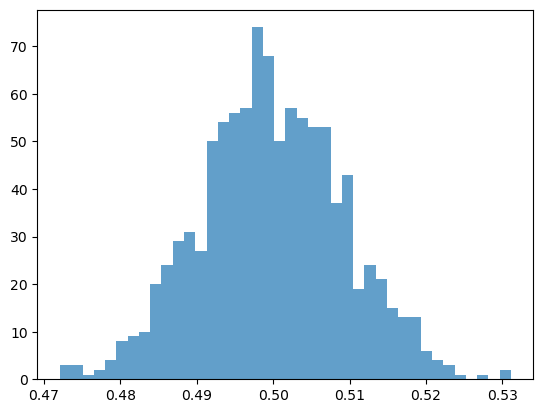

In [9]:
meanvals = np.array(meanvals)
mean_of_meanvals = mean(meanvals)
geom_mean_of_meanvals = geom_mean(meanvals)
median_of_meanvals = median(meanvals)
variance_of_meanvals = variance(meanvals)
std_of_meanvals = std(meanvals)
skewness_of_meanvals = skewness(meanvals)
kurtosis_of_meanvals = kurtosis(meanvals)

print(f"mean of mean values : {mean_of_meanvals}")
print(f"geom_mean of mean values : {geom_mean_of_meanvals}")
print(f"median of mean values : {median_of_meanvals}")
print(f"variance of mean values : {variance_of_meanvals}")
print(f"std of mean values : {std_of_meanvals}")
print(f"skewness of mean values : {skewness_of_meanvals}")
print(f"kurtosis of mean values : {kurtosis_of_meanvals}")
plt.hist(meanvals, bins=40, alpha=0.7)
plt.show()


In [ ]:
# Method 2. shuffle the data each time we pick a subset
# then we remove the picked subset from the data
# and repeat the process 1000 times
data_copy = dataset2.copy()
data_shuffle = np.random.permutation(data_copy)
ind_to_remove = np.arange(0,1000)
meanvals2 = []
i=0
while i<1000:
    subset = data_shuffle[ind_to_remove]
    meanvals2.append(mean(subset))
    data_shuffle = np.delete(data_shuffle, ind_to_remove)
    np.random.shuffle(data_shuffle)
    i += 1


mean of meanvals2 : 0.4998205448001243
geom_mean of meanvals2 : 0.4997364079362381
median of meanvals2 : 0.49953085430543376
variance of meanvals2 : 8.417698305043797e-05
std of meanvals2 : 0.009174801526487534
skewness of meanvals2 : 0.10323953329369111
kurtosis of meanvals2 : 0.043981645665518876


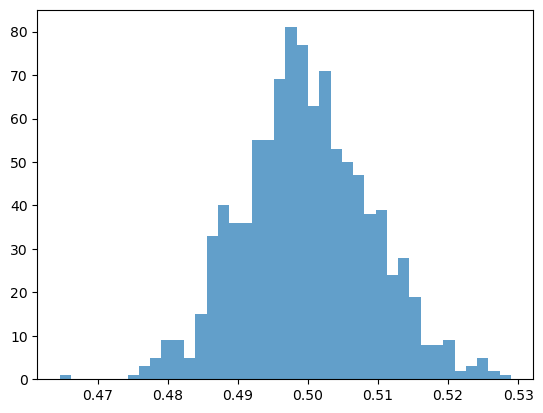

In [69]:
meanvals2 = np.array(meanvals2)
mean_of_meanvals2 = mean(meanvals2)
geom_mean_of_meanvals2 = geom_mean(meanvals2)
median_of_meanvals2 = median(meanvals2)
variance_of_meanvals2 = variance(meanvals2)
std_of_meanvals2 = std(meanvals2)
skewness_of_meanvals2 = skewness(meanvals2)
kurtosis_of_meanvals2 = kurtosis(meanvals2)
print(f"mean of meanvals2 : {mean_of_meanvals2}")
print(f"geom_mean of meanvals2 : {geom_mean_of_meanvals2}")
print(f"median of meanvals2 : {median_of_meanvals2}")
print(f"variance of meanvals2 : {variance_of_meanvals2}")
print(f"std of meanvals2 : {std_of_meanvals2}")
print(f"skewness of meanvals2 : {skewness_of_meanvals2}")
print(f"kurtosis of meanvals2 : {kurtosis_of_meanvals2}")
plt.hist(meanvals2, bins=40, alpha=0.7)
plt.show()

The sample appear to be normally distributed. This is consistent with the central limit theorem, which states that for a large enough size of samples, the distribution of the sample means will be normally distributed if the number of samples is sufficiently large.

 We can check this with three steps. Firstly, the mean, median and geometric mean are all very close to each other, which indicates that the distribution is very symmetrical.

 Next, the skewness is close to 0, which also indicates that the distribution is very symmetrical.

 Finally, the kurtosis is close to 0, which indicates that the sharpness of the peak is similar to that of a normal distribution.